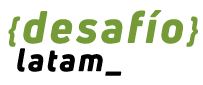

# Prueba - Fundamentos Data Science
## Nombre: José Gómez Ponce

## Objetivo
- Implementar los contenidos aprendidos a lo largo de las 8 unidades para resolver dos problemas de carácter obligatorio.
- Se deben desarrollar dos desafíos aplicando lo aprendido en el módulo Fundamentos de DataScience.
- Ambos desafíos presentarán un enunciado a solucionar, así como una descripción de los datosdisponibles a utilizar.
- Cada una de las respuestas deben considerar los requerimientos mínimos y buenas prácticasdetalladas a continuación.

## Consideraciones Generales
La prueba debe desarrollarse en consideración a los siguientes puntos:

- Una sección llamada <b>Preliminares</b> donde se realiza la descripción del problema y objetivos, asícomo explicar cómo implementarán su solución (debe considerar qué criterios de optimización y métricas de desempeño).
- Una sección llamada <b>Aspectos computacionales</b> donde se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.
- Una sección llamada <b>Descripción</b> donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).
- Una sección llamada <b>Modelación descriptiva</b>, que buscará definir cuáles son los principales determinantes del objeto de estudio. En base a esta sección se podrá construír o depurar el modelo predictivo.
- Una sección llamada <b>Modelación predictiva</b>, donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener una reseña sobre el por qué se diseño de esa forma.



## Hito 1: Sesión Presencial 1, Unidad 7
Completar el punto de Preliminares, así como Aspectos computacionales.

Elementos a considerar en éste hito:
- Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
- Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto)
- Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1punto)
- Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados.

# Aspectos Computacionales

- anaconda                  2019.07
- anaconda-client           1.7.2
- anaconda-navigator        1.9.7
- conda                     4.7.12
- conda-env                 2.6.0
- ipython                   7.6.1
- jupyter                   1.0.0 
- jupyter_client            5.3.1
- jupyterlab                1.0.2
- jupyterlab_server         1.0.0
- matplotlib                3.2.2
- missingno                 0.4.2
- numpy                     1.16.4
- pandas                    1.0.5
- pip                       20.1.1
- plotly                    3.10.0
- python                    3.7.3
- scikit-learn              0.21.2
- scipy                     1.5.0
- seaborn                   0.9.0
- statsmodels               0.10.0

# Preliminares

## Desafío 1: Determinantes del ingreso Enunciado
Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo. 

Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.


### Vector objetivo [income]
<div class="alert alert-block alert-warning">
<b>Comentario:</b> 
<br>"Esto corresponde a un problema de Clasificación".
<br>Ya que tiene 2 clases, se infiere que es una <b> Regresión Logística</b>.
<br>Se comenzará con el EDA de la data, haciendo revisión de clases, distribuciones, valores perdidos y la imputación de estos. Una vez listo este paso, se binarizará las variables.
    
<br>- Posteriormente se seguirá con el análisis de regresión Logistica hasta obtener un modelo con métricas aceptables

</div><br>


In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import scipy.stats as stats
import missingno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import confusion_matrix



In [5]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### Aspectos adicionales a considerar
La base de datos contiene los valores perdidos como "?". Deberá transformarlos para poder trabajar de forma adecuada.

In [7]:
df_subset = df.replace('?', np.nan)

In [8]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<div class="alert alert-block alert-warning">
<b>Comentario:</b> 
Segun lo reportado por el método Info del DataFrame, las columnas <b>workclass</b>, <b>occupation</b>, y <b>native-country</b> tienen valores N/A
</div><br>


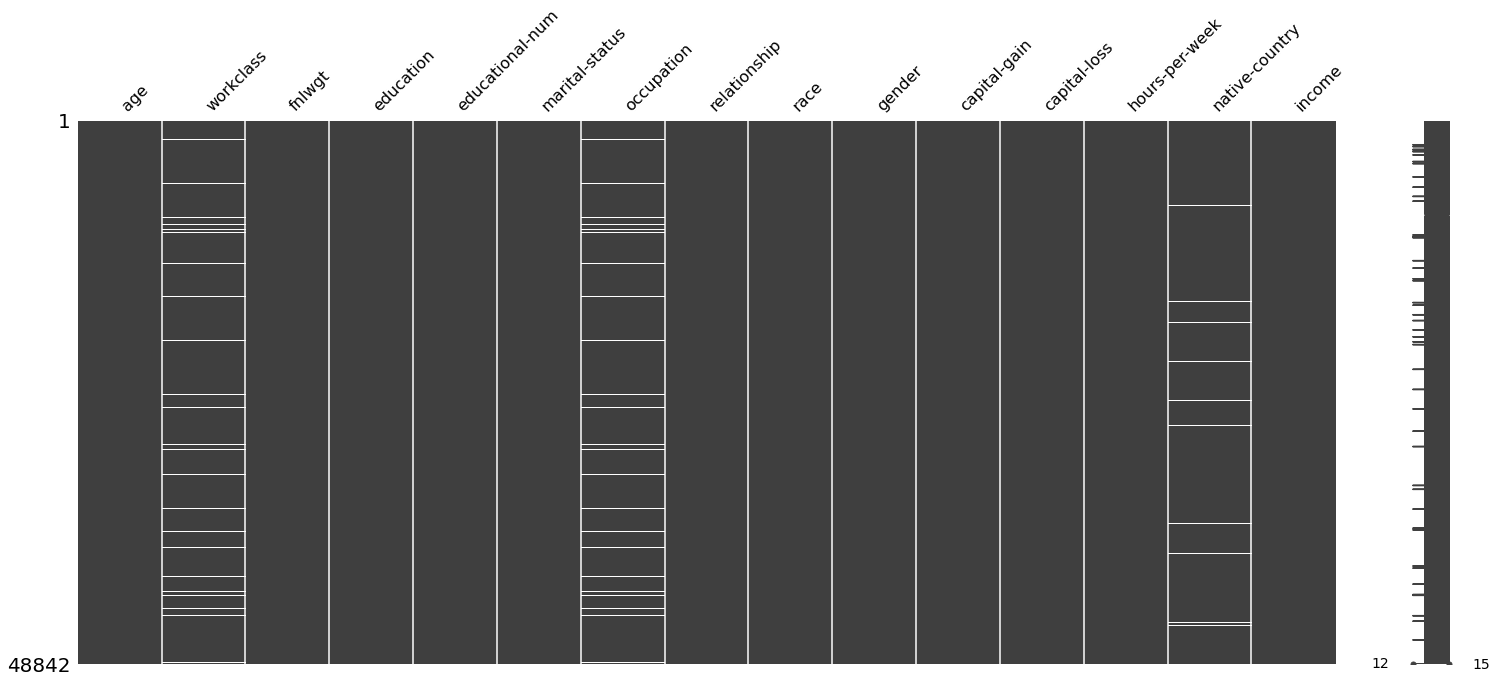

In [9]:
missingno.matrix(df_subset)

In [10]:
for col in ['workclass', 'occupation', 'native-country']:
    null_percent = len(df_subset[df_subset[col].isna()])
    registros_totales = len(df_subset)
    
    print("Porcentaje de datos perdidos de {}: {}%".format(col, round(null_percent/registros_totales*100, 2)))
print("Porcentaje de datos perdidos NO se eliminan los NAN: {}".format(round(len(df_subset.dropna())/registros_totales*100, 2)))

Porcentaje de datos perdidos de workclass: 5.73%
Porcentaje de datos perdidos de occupation: 5.75%
Porcentaje de datos perdidos de native-country: 1.75%
Porcentaje de datos perdidos NO se eliminan los NAN: 92.59


<div class="alert alert-block alert-warning">
<b>Comentario:</b> 
Dado que al dropear los NaN se mantiene suficiente información, se eliminarán los registros que contengan esos valores
</div><br>


In [11]:
df_subset.dropna(inplace=True)

#### Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
<br>`occupation` debe recodificarse como collars siguiendo una nomenclatura similar a:
- `white-collar` $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
- `blue-collar` $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
- `others` $\leftarrow$ Other-service, Armed-Forces

<br>`workclass` debe recodificarse como workclass_recod siguiendo una nomenclatura similar a:
- `federal-gov` $\leftarrow$ Federal-gov
- `state-level-gov` $\leftarrow$ State-gov, Local-gov.
- `self-employed` $\leftarrow$ Self-emp-inc, Self-emp-not-inc 
- `unemployed` $\leftarrow$ Never-worked, Without-pay.

<br>`education` debe recodificarse como educ_recod siguiendo una nomenclatura similar a :
-`preschool` $\leftarrow$ Preschool
- `elementary-school` $\leftarrow$ 1st-4th, 5th-6th
- `high-school` $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad 
- `college` $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
- `university` $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate

<br>`marital-status` debe recodificarse como civstatus siguiendo una nomenclatura similar a :
- `married` $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
- `divorced` $\leftarrow$ Divorced 
- `separated` $\leftarrow$ Separated
- `widowed` $\leftarrow$ Widowed.

<br>`native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes.
<br>`income` debe recodificarse de forma binaria.

### Recodificación de "occupation":

In [12]:
df_subset['occupation'] = df_subset['occupation'].replace([
    #white-collar
    'Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales','Tech-support',
    #blue-collar
    'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners', 'Farming-fishing','Protective-serv','Priv-house-serv',
    #others
    'Other-service', 'Armed-Forces'
],
[   #white-collar
    'white-collar','white-collar','white-collar','white-collar', 'white-collar',
    #blue-collar
    'blue-collar', 'blue-collar', 'blue-collar','blue-collar', 'blue-collar', 'blue-collar', 'blue-collar',
    #others
    'others', 'others'
])

In [13]:
df_subset.occupation.value_counts()

white-collar    24360
blue-collar     16040
others           4822
Name: occupation, dtype: int64

### Recodificación de "Workclass":

In [14]:
df_subset['workclass'] = df_subset['workclass'].replace([
    'Federal-gov',
    'State-gov', 'Local-gov',
    'Self-emp-inc', 'Self-emp-not-inc',
    'Never-worked', 'Without-pay'
],
[
    'federal-gov','state-level-gov', 'state-level-gov',
    'self-employed', 'self-employed', 'unemployed', 'unemployed'
])

In [15]:
df_subset['workclass'].value_counts()

Private            33307
self-employed       5442
state-level-gov     5046
federal-gov         1406
unemployed            21
Name: workclass, dtype: int64

### Recodificación de "Education":

In [16]:
df_subset['education'] = df_subset['education'].replace([
    'Preschool',
    '1st-4th', '5th-6th',
    '7th-8th', '9th', '10th','11th', '12th', 'HS-grad',
    'Assoc-voc', 'Assoc-acdm', 'Some-college',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
],
[
    'preschool', 
    'elementary-school', 'elementary-school',
    'high-school', 'high-school', 'high-school','high-school', 'high-school', 'high-school',
    'college', 'college', 'college',
    'university', 'university', 'university', 'university'
])

df_subset['education'].value_counts()


high-school          19701
college              13365
university           11413
elementary-school      671
preschool               72
Name: education, dtype: int64

### Recodificación de "Marital Status":

In [17]:
df_subset['marital-status'] = df_subset['marital-status'].replace([
    'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',
    'Divorced',
    'Separated',
    'Widowed'
],
[
    'married','married', 'married',
    'divorced',
    'separated',
    'widowed'
])

df_subset['marital-status'].value_counts()

married          21639
Never-married    14598
divorced          6297
separated         1411
widowed           1277
Name: marital-status, dtype: int64

### Recodificación de "Native country":

In [18]:
df_subset['native-country'] = df_subset['native-country'].replace ([
    'United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic',
    'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada',
    'Nicaragua', 'Honduras','Jamaica','Ecuador', 'Haiti','Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)',
    #europa
    'Ireland', 'Germany','Poland', 'England', 'Italy', 'Portugal',
    'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'France', 'Holand-Netherlands',
    #asia
    'Philippines', 'Thailand', 'Vietnam',
    'South', 'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China',
    'Iran', 'Hong', 'Philippines'
],
[
    'america', 'america','america', 'america', 'america',
    'america', 'america', 'america', 'america', 'america',
    'america','america','america','america', 'america', 'america',
    'america',
    #europa
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    #asia
    'asia', 'asia', 'asia',
    'asia', 'asia', 'asia', 'asia', 'asia', 'asia', 'asia',
    'asia', 'asia', 'asia'
])

df_subset['native-country'].value_counts()

america    43453
asia        1031
europa       738
Name: native-country, dtype: int64

### Recodificación de "Income":

In [19]:
df_subset['income'] = np.where(df_subset['income'] == '>50K', 1, 0)

In [20]:
df_subset['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

### Recodificación del nombre de las columnas

In [21]:
df_subset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [22]:
df_subset.columns = [
    'age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
    'civstatus', 'collars', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'region',
    'income'
]
df_subset.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income'],
      dtype='object')

# Nuevo EDA
#### Observamos el comportamiento de las clases en las variables de tipo Objeto y los respectivos histogramas y bloxplot para las variables numericas

In [23]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass_recod  45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   educ_recod       45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   civstatus        45222 non-null  object
 6   collars          45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  region           45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [24]:
for col in df_subset.columns:
    if df_subset[col].dtypes == 'object':
        print("## {} ##".format(col.upper()))
        print(round(df_subset[col].value_counts('%'),2))
        print()

## WORKCLASS_RECOD ##
Private            0.74
self-employed      0.12
state-level-gov    0.11
federal-gov        0.03
unemployed         0.00
Name: workclass_recod, dtype: float64

## EDUC_RECOD ##
high-school          0.44
college              0.30
university           0.25
elementary-school    0.01
preschool            0.00
Name: educ_recod, dtype: float64

## CIVSTATUS ##
married          0.48
Never-married    0.32
divorced         0.14
separated        0.03
widowed          0.03
Name: civstatus, dtype: float64

## COLLARS ##
white-collar    0.54
blue-collar     0.35
others          0.11
Name: collars, dtype: float64

## RELATIONSHIP ##
Husband           0.41
Not-in-family     0.26
Own-child         0.15
Unmarried         0.11
Wife              0.05
Other-relative    0.03
Name: relationship, dtype: float64

## RACE ##
White                 0.86
Black                 0.09
Asian-Pac-Islander    0.03
Amer-Indian-Eskimo    0.01
Other                 0.01
Name: race, dtype: float64

## G

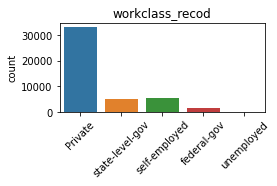

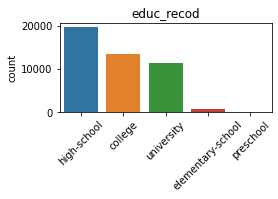

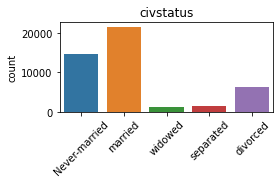

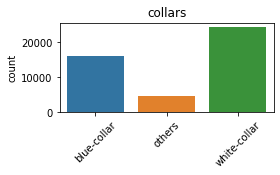

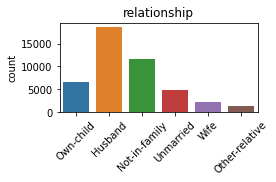

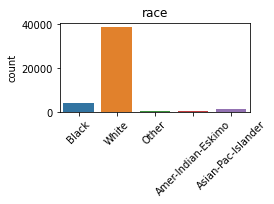

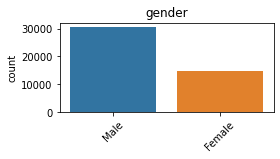

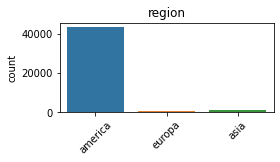

In [25]:
for colname, col in df_subset.select_dtypes('O').iteritems():    
    plt.figure(figsize=(4,2))
    sns.countplot(df_subset[colname])
    plt.title(colname)
    plt.xlabel("")
    plt.tight_layout()
    plt.xticks(rotation=45)

<div class="alert alert-block alert-warning">
<b>Analisis Visual de Clases:</b> 
<br>- <b>workclass_recod:</b> Contiene claramente una clase dominante llamada "Private", siendo esta el 74% de los datos.
<br>- <b>educ_recod:</b> Posee 3 clases dominantes (high-school, college, university, ocupando el 44%, 30% y 25% de los datos.
<br>- <b>civstatus:</b> Contiene 2 clases mayormente dominante (Never-married y Married, ocupando el 47% y 33% de los datos). Les sigue "divorced" con el 14% de los datos.
<br>- <b>collars:</b> Luego de ser recodificada, posee 3 clases donde se observa que la clase dominante sería white-collar abarcando el 54% de los datos, versus blue-collar con el 35% y others con 11%.
<br>- <b>relationship:</b> Contiene 6 clases distintas, donde la con mayor registros corresponde a Husband (40% de los datos) seguida de Not-in-family con 26% de los datos registrados. 
<br>- <b>race:</b> Contiene una gran clase dominante correspondiente a White que abarca el 86% de los datos.
<br>- <b>gender:</b> Contiene 2 clases, siendo Male la clase dominante sobre Female con 67% y 37% respectivamente.
<br>- <b>region:</b> Contiene 3 clases, sin embargo 1 gran dominante correspondiente a "america" abarcando el 96% de los datos
</div><br>

## AGE ##


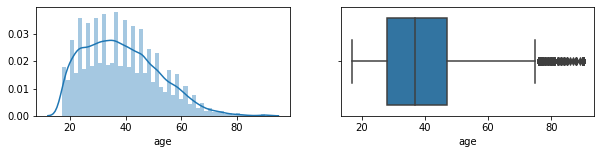

## FNLWGT ##


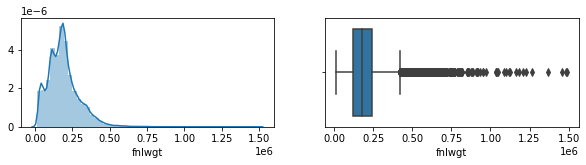

## EDUCATIONAL-NUM ##


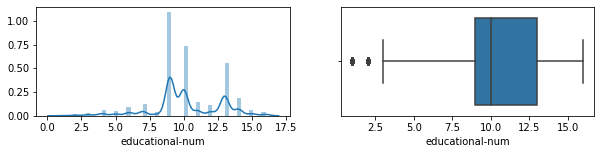

## CAPITAL-GAIN ##


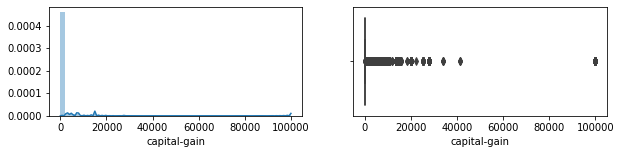

## CAPITAL-LOSS ##


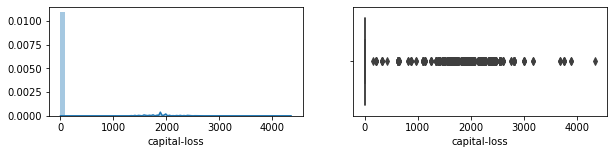

## HOURS-PER-WEEK ##


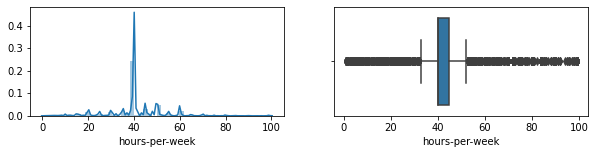

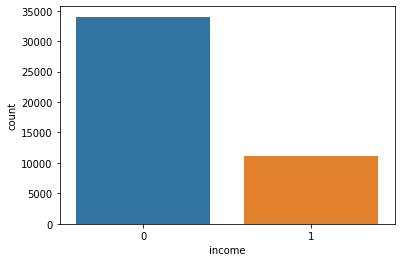

In [26]:
for col in df_subset.columns:
    if df_subset[col].dtypes == 'int64':
        if col == 'income':
            sns.countplot(df_subset[col])
        else:
            fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,2))
            print("## {} ##".format(col.upper()))
            sns.distplot(df_subset[col], ax=ax1)
            sns.boxplot(df_subset[col], ax=ax2)
            plt.show()
    

<div class="alert alert-block alert-warning">
<b>Analisis Visual de Clases:</b> 
<br> Todas las variables presentan     
<br>- <b>age:</b> La mayor cantidad de registro se presenta entre los 25 y los 40 años de edad.
<br>- <b>fnlwgt:</b> Ponderador muestral muestra una clara inclinación hacia datos más bajos, presentando muchos valores fuera de la tendencia.
<br>- <b>educational-num:</b> Los datos se agrupan entre los 5 y los 16, habiendo una tendencia alrededor de los 10. 
<br>- <b>capital-gain:</b> Se observa registros con ganancia fuera del trabajo salariado, pero alejados de la tendencia.
<br>- <b>capital-loss:</b> Al igual que capital-gain, se observa varios registros atipicos a la tendencia.
<br>- <b>hours-per-week:</b> Se observa que la tendencia se presenta alrededor de las 40 horas, sin embargo, se observa una gran cantidad de valores ajenos a esta tendencia.
<br>- <b>income:</b> Contiene 2 clases, siendo 0 (ingresos menores a USD 50k anuales) la clase dominante sobre 1 (ingresos mayores a USD 50k anuales). Probablemente, dado este desvalance de clases en la variable dependiente, haya un mayor desempeño a clasificar la clase 0.

</div><br>

In [27]:
df_subset.groupby('income').mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,36.749427,190175.214235,9.630770,149.023402,54.032428,39.372023
1,44.006067,188397.967345,11.598501,3991.791667,193.487063,45.690489


<div class="alert alert-block alert-warning">
<b>Analisis promedios vs variable objetivo:</b> 
Individuos que ganan más de USD 50K presentarían un promedio de edad superior, además de trabajar más horas en promedio y a su vez, tener mayores ingresos fuera del horario de trabajo. Se puede ingerir que esta variable "capital-gain" será determinante al clasificar individuos nuevos.
</div><br>

In [28]:
print("El Nuevo Dataframe contiene {} linea repetidas".format(len(df_subset[df_subset.duplicated()])))

El Nuevo Dataframe contiene 95 linea repetidas


In [32]:
df_subset_2 = df_subset.copy()

### Conversión de variables categóricas a numéricas

In [33]:
df_subset_3 = pd.get_dummies(df_subset_2, drop_first=True )

In [34]:
df_subset_3.shape


(45222, 33)

# Modelacion Descriptiva
Se observará la correlacion de las variables previo a la construccion del modelo

In [35]:
col_recor = [i.replace("-","_") for i in df_subset_3.columns]

In [36]:
df_subset_3.columns = col_recor


## Correlacion de las variables

In [42]:
def fetch_features(df,vector_objetivo='income'):
    # extraemos los nombres de las columnas en la base de datos
    columnas = df.columns
    
    # generamos 3 arrays vacíos para guardar los valores 
    # nombre de la variable
    attr_name = []
    # correlación de pearson
    pearson_r = []
    # valor absoluto de la correlación 
    abs_pearson_r = []
    
    # para cada columna en el array de columnas
    for col in columnas:
        # si la columna no es la dependiente 
        if col != vector_objetivo:
            # adjuntar el nombre de la variable en attr_name
            attr_name.append(col)
            # adjuntar la correlación de pearson 
            pearson_r.append(df[col].corr(df[vector_objetivo]))
            # adjuntar el valor absoluto de la correlación de pearson 
            abs_pearson_r.append(abs(df[col].corr(df[vector_objetivo])))
            
    # transformamos los arrays en un DataFrame
    features = pd.DataFrame({
        f'{vector_objetivo} vs': attr_name, 
        'corr':pearson_r, 
        'abs_corr':abs_pearson_r
    })
    # generamos el index con los nombres de las variables
    features = features.set_index(f'{vector_objetivo} vs')
    # ordenamos los valores de forma descendiente 
    features.sort_values(by=['abs_corr'], ascending=False)
    #print(f"Correlaciones contra {vector_objetivo}\n")
    return(features)

In [45]:
fetch_features(df_subset_3).sort_values('abs_corr', ascending=False)

,corr,abs_corr
income vs,,
civstatus_married,0.437678,0.437678
educational_num,0.332800,0.332800
educ_recod_university,0.322283,0.322283
age,0.237040,0.237040
hours_per_week,0.227199,0.227199
educ_recod_high_school,-0.223086,0.223086
relationship_Own_child,-0.222635,0.222635
collars_white_collar,0.221459,0.221459
capital_gain,0.221034,0.221034


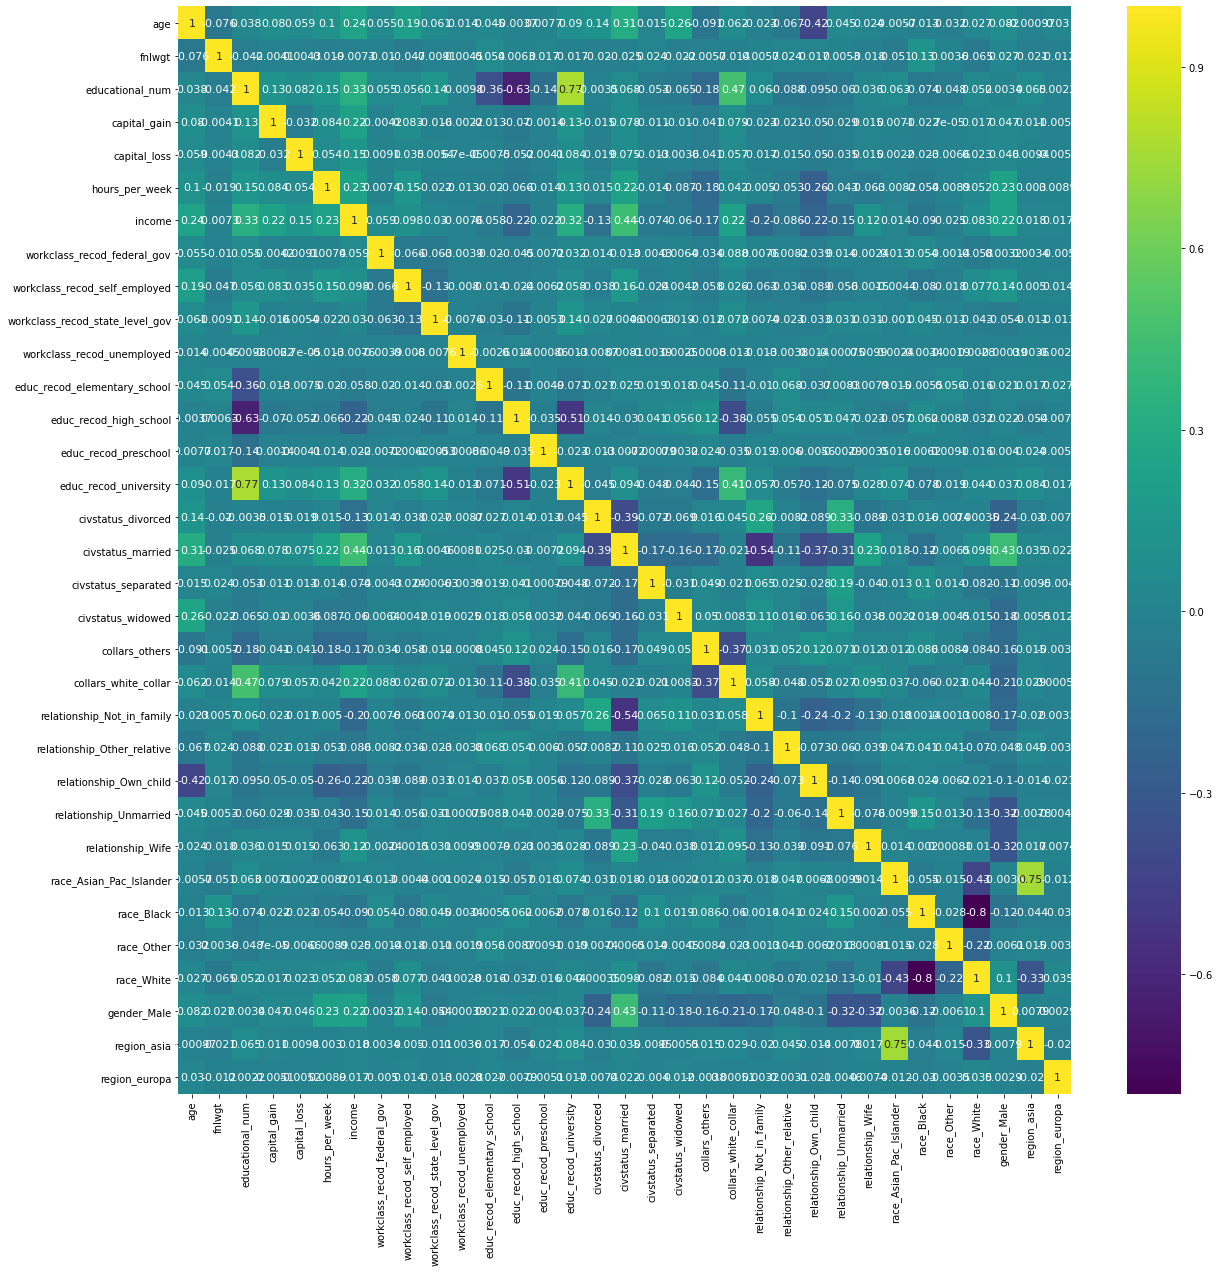

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df_subset_3.corr(), annot=True, cmap='viridis', annot_kws={'fontsize':11})

<div class="alert alert-block alert-warning">
<b>Analisis de correlaciones:</b> 
Las variables con mayor correlacion con la variable objetivo no presentan altas correlaciones entre ellas y por ahora, se construirá un modelo con todas las variables. Posteriormente se decidirá cuales filtrar ya sea por P valor o por correlación con la variable "income"
</div><br>

In [60]:
auxvar = ""
for i in df_subset_3.columns:
    if i == 'income': continue
    else:
        auxvar += "{} + ".format(i)
#print(auxvar[:-2])

In [62]:
m1_logit = smf.logit('income ~ {}'.format(auxvar[:-2]), data= df_subset_3).fit()

Optimization terminated successfully.
         Current function value: 0.331645
         Iterations 11


In [63]:
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           32
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.4077
Time:                        23:28:09   Log-Likelihood:                -14998.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -8.6959      0.301    -28.852      0.000      -9.287      -8.105
age                                 0.0253      0.001     18.673      0.000       0.023       0.028
fnlwgt                           7.353e-07    1.4e-07      5.253      0.000    4.61e-07    1.01e-06
educational_num                     0.2768      0.016     17.258      0.000       0.245       0.308
capital_gain                        0.0003   8.61e-06     36.894      0.000       0.000       0.000
capital_loss                        0.0007   3.08e-05     21.319      0.000       0.001       0.001
hours_per_week                      0.0297      0.001     22.483      0.000       0.027       0.032
workclass_recod_federal_gov         0.4456      0.075      5.942      0.000       0.299       0.593
workclass_recod_self_employed      -0.3429      0.042     -8.120      0.000      -0.426      -0.260
workclass_recod_state_level_gov    -0.0735      0.046     -1.602      0.109      -0.163       0.016
workclass_recod_unemployed         -1.1019      0.800     -1.377      0.169      -2.671       0.467
educ_recod_elementary_school        0.1452      0.237      0.612      0.540      -0.320       0.610
educ_recod_high_school             -0.0648      0.047     -1.386      0.166      -0.156       0.027
educ_recod_preschool               -3.9733      4.067     -0.977      0.329     -11.945       3.999
educ_recod_university               0.0879      0.061      1.446      0.148      -0.031       0.207
civstatus_divorced                  0.4875      0.072      6.749      0.000       0.346       0.629
civstatus_married                   1.2946      0.137      9.479      0.000       1.027       1.562
civstatus_separated                 0.4572      0.135      3.398      0.001       0.193       0.721
civstatus_widowed                   0.5764      0.133      4.347      0.000       0.316       0.836
collars_others                     -0.7289      0.087     -8.387      0.000      -0.899      -0.559
collars_white_collar                0.6016      0.035     17.010      0.000       0.532       0.671
relationship_Not_in_family         -0.9589      0.134     -7.166      0.000      -1.221      -0.697
relationship_Other_relative        -1.4183      0.187     -7.580      0.000      -1.785      -1.052
relationship_Own_child             -1.9398      0.166    -11.670      0.000      -2.266      -1.614
relationship_Unmarried             -1.1899      0.150     -7.915      0.000      -1.485      -0.895
relationship_Wife                   1.0600      0.084     12.599      0.000       0.895       1.225
race_Asian_Pac_Islander             0.8007      0.223      3.587      0.000       0.363       1.238
race_Black                          0.2628      0.189      1.390      0.165      -0.108       0.634
race_Other                          0.2419      0.272      0.889      0.374      -0.291       0.775
race_White                          0.507

In [66]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.408     
Dependent Variable:       income                AIC:                   30061.3311
Date:                     2020-06-24 23:32      BIC:                   30349.0693
No. Observations:         45222                 Log-Likelihood:        -14998.   
Df Model:                 32                    LL-Null:               -25322.   
Df Residuals:             45189                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           11.0000                                                
---------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                       -8.6959   0.3014 -28.8520 0.0000  -9.2866 -8.1052
age                              0.0253   0.0014  18.6728 0.0000   0.0226  0.0279
fnlwgt                           0.0000   0.0000   5.2531 0.0000   0.0000  0.0000
educational_num                  0.2768   0.0160  17.2579 0.0000   0.2454  0.3083
capital_gain                     0.0003   0.0000  36.8937 0.0000   0.0003  0.0003
capital_loss                     0.0007   0.0000  21.3192 0.0000   0.0006  0.0007
hours_per_week                   0.0297   0.0013  22.4829 0.0000   0.0271  0.0323
workclass_recod_federal_gov      0.4456   0.0750   5.9419 0.0000   0.2986  0.5926
workclass_recod_self_employed   -0.3429   0.0422  -8.1197 0.0000  -0.4257 -0.2602
workclass_recod_state_level_gov -0.0735   0.0459  -1.6017 0.1092  -0.1634  0.0164
workclass_recod_unemployed      -1.1019   0.8003  -1.3768 0.1686  -2.6705  0.4667
educ_recod_elementary_school     0.1452   0.2372   0.6124 0.5403  -0.3196  0.6101
educ_recod_high_school          -0.0648   0.0467  -1.3858 0.1658  -0.1564  0.0268
educ_recod_preschool            -3.9733   4.0673  -0.9769 0.3286 -11.9452  3.9985
educ_recod_university            0.0879   0.0608   1.4456 0.1483  -0.0313  0.2071
civstatus_divorced               0.4875   0.0722   6.7489 0.0000   0.3459  0.6291
civstatus_married                1.2946   0.1366   9.4786 0.0000   1.0269  1.5623
civstatus_separated              0.4572   0.1345   3.3983 0.0007   0.1935  0.7208
civstatus_widowed                0.5764   0.1326   4.3465 0.0000   0.3165  0.8363
collars_others                  -0.7289   0.0869  -8.3874 0.0000  -0.8992 -0.5585
collars_white_collar             0.6016   0.0354  17.0097 0.0000   0.5323  0.6709
relationship_Not_in_family      -0.9589   0.1338  -7.1661 0.0000  -1.2211 -0.6966
relationship_Other_relative     -1.4183   0.1871  -7.5801 0.0000  -1.7850 -1.0516
relationship_Own_child          -1.9398   0.1662 -11.6697 0.0000  -2.2656 -1.6140
relationship_Unmarried          -1.1899   0.1503  -7.9148 0.0000  -1.4845 -0.8952
relationship_Wife                1.0600   0.0841  12.5991 0.0000   0.8951  1.2249
race_Asian_Pac_Islander          0.8007   0.2233   3.5867 0.0003   0.3632  1.2383
race_Black                       0.2628   0.1891   1.3898 0.1646  -0.1078  0.6335
race_Other                       0.2419   0.2719   0.8894 0.3738  -0.2911  0.7748
race_White                       0.5072   0.1797   2.8222 0.0048   0.1550  0.8595
gender_Male                      0.7806   0.0643  12.1451 0.0000   0.6546  0.9066
region_asia                     -0.5129   0.1502  -3.4157 0.0006  -0.8072 -0.2186
region_europa                    0.2028   0.1057   1.9180 0.0551  -0.0044  0.4100
=================================================================================

"""

<div class="alert alert-block alert-warning">
<b>Analisis Modelo_1:</b> 
Observando los P>|z|, las variables SIN significancia estadística al 95% serian: race_Other, race_Black, educ_recod_university, workclass_recod_state_level_gov, workclass_recod_unemployed, educ_recod_elementary_school, educ_recod_high_school, educ_recod_preschool.

<br> Para hacer la siguiente sección, <b>se utilizará el resto de variables que si tiene significancia estadística</b>
</div><br>

# Modelacion Predictiva

In [67]:
cols_x = []
for i, col in enumerate(df_subset_3.columns):
    if col not in ['income', 'workclass_recod_state_level_gov', 'workclass_recod_unemployed','educ_recod_elementary_school','educ_recod_high_school','educ_recod_preschool','educ_recod_university', 'race_Black', 'race_Other', 'region_europa']:
        cols_x.append(col)

In [69]:
cols_x

['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_recod_federal_gov',
 'workclass_recod_self_employed',
 'civstatus_divorced',
 'civstatus_married',
 'civstatus_separated',
 'civstatus_widowed',
 'collars_others',
 'collars_white_collar',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian_Pac_Islander',
 'race_White',
 'gender_Male',
 'region_asia']

In [70]:
X = df_subset_3[cols_x]

In [71]:
y = df_subset_3['income']

In [72]:
print(X.shape, y.shape)

(45222, 23) (45222,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.33, random_state=42)

In [75]:
# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
default_model = LogisticRegression().fit(X_train, y_train)


In [76]:
default_model.coef_

array([[ 0.3584652 ,  0.09290119,  0.7638928 ,  2.33659963,  0.26348848,
         0.36530769,  0.08234999, -0.10394548,  0.16535389,  0.61633274,
         0.09385856,  0.06219592, -0.23498027,  0.29018174, -0.42373223,
        -0.27185377, -0.68639823, -0.38455799,  0.21011691,  0.11375994,
         0.08093182,  0.33934203, -0.09257816]])

In [77]:
yhat = default_model.predict(X_test)

In [78]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11232
           1       0.73      0.60      0.66      3692

    accuracy                           0.85     14924
   macro avg       0.80      0.76      0.78     14924
weighted avg       0.84      0.85      0.84     14924



<div class="alert alert-block alert-warning">
<b>Classification Report Modelo_1:</b> 
<br>La <b>Precisión</b> del modelo indica que para ambas clases, tiene una alta tasas de predicciones correctas entre las etiquetas positivas. 
<br>El <b>Recall</b> indica que predice correctamente más valores para la clase 0. Esto puede deberse al desvalance de clases mostrado en el EDA. 
<br>Dado el <b>f1-score</b>, como se menciono anteriormente, el modelo tiene un mejor desempeño clasificando a la clase 0.

</div><br>

In [79]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat_2 = default_model.predict_proba(X_test)[:, 1]
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat_2)

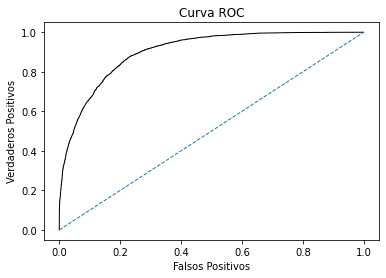

In [81]:
 
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1, c='black')
plt.plot([0, 1], ls="--", lw=1) # BISECTRIZ
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [82]:
confusion_matrix = confusion_matrix(y_test, yhat)
print(confusion_matrix)

[[10397   835]
 [ 1466  2226]]


In [83]:
print("correctamente clasificados: {}".format(confusion_matrix[0][0]+confusion_matrix[1][1]))

correctamente clasificados: 12623


In [84]:
print("incorrectamente clasificados: {}".format(confusion_matrix[0][1]+confusion_matrix[1][0]))

incorrectamente clasificados: 2301


In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(y_test,yhat)

0.764292037839573

<div class="alert alert-block alert-warning">
<b>Comentarios:</b>
<br>El modelo tiene una capacidad predictiva adecuada, ya que tiene una curva (negra continua) por sobre la bisectriz (azul punteada).
<br>La tasa de verdaderos positivos eś mayor que la tasa de falsos positivos.
<br>Dado el f1-score, el modelo tiene un mejor desempeño clasificando a la clase 0.
<br>Dado el área bajo la curva, el modelo estaría correcto pero podría mejorar.
</div><br>